In [1]:
%matplotlib inline
import sys
sys.path.append('./seq2seq/')

In [2]:
import torch
from torch.utils.model_zoo import load_url
from seq2seq.models import Img2Seq
from seq2seq.tools.inference import CaptionGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.misc import imresize

In [3]:
checkpoint = torch.load('./results/recurrent-25/model_best.pth',map_location='cpu')
model_config = checkpoint['config'].model_config
model = Img2Seq(**model_config)
model.load_state_dict(checkpoint['state_dict'])

tok, img_transform = checkpoint['tokenizers'].values()

In [7]:
def show_and_tell(caption_model,filename):
    img = Image.open(filename, 'r')
    
    %matplotlib inline
    plt.figure()
    plt.imshow(np.asarray(img))
    print ('caption:',caption_model.describe(img))

    return img, caption_model.describe(img)

def visualize_attention(img, attention, max_size=128., thresh=0.5):
    img = np.asarray(img)
    W, H = img.shape[1], img.shape[0]
    ratio = max_size / max(W,H)
    W, H = int(W*ratio), int(H*ratio)
    img = imresize(img, (H,W))
    attention, preds = attention
    fig, plots = plt.subplots(len(preds), 1, figsize=(100, 40))
    for i, p in enumerate(preds):
        resized_attention = imresize(attention[i].data.cpu().numpy(), (H,W))
        resized_attention = resized_attention / resized_attention.max()
        mask = resized_attention > thresh
        masked_img = img * mask[:,:,None]
        plots[i].set_title(p)
        plots[i].imshow(masked_img)
    plt.tight_layout()
    plt.show()

In [8]:
attn = False
if attn:
    caption_model = CaptionGenerator(checkpoint,
                                   image_transform=img_transform(allow_var_size=True, train=False),
                                   beam_size=12,get_attention=True, length_normalization_factor=0.4,max_output_length=20)
else:
    caption_model = CaptionGenerator(checkpoint,
                                   image_transform=img_transform(allow_var_size=True, train=False),
                                   beam_size=12,get_attention=False, length_normalization_factor=0.4,max_output_length=20)

in describe
preds:  [[tensor(28357), tensor(15), tensor(6), tensor(33), tensor(7), tensor(4), tensor(57), tensor(7), tensor(73), tensor(3)]]
caption: [' sitting on top of a plate of food']
in describe
preds:  [[tensor(28357), tensor(15), tensor(6), tensor(33), tensor(7), tensor(4), tensor(57), tensor(7), tensor(73), tensor(3)]]
[' sitting on top of a plate of food']


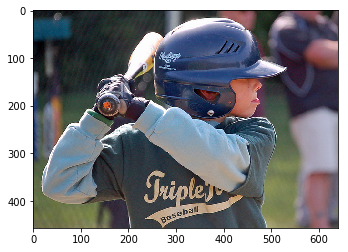

In [9]:
img = './COCO_val2014_000000200348.jpg'

img, caption = show_and_tell(caption_model,img)
print(caption)

in describe
preds:  [[tensor(28357), tensor(15), tensor(6), tensor(33), tensor(7), tensor(4), tensor(57), tensor(7), tensor(73), tensor(3)]]
caption: [' sitting on top of a plate of food']
in describe
preds:  [[tensor(28357), tensor(15), tensor(6), tensor(33), tensor(7), tensor(4), tensor(57), tensor(7), tensor(73), tensor(3)]]
[' sitting on top of a plate of food']


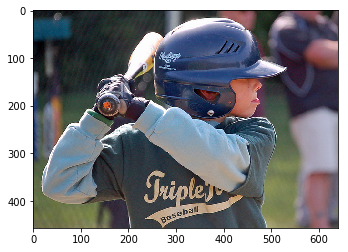

In [10]:
img = './COCO_val2014_000000200348.jpg'

if attn:
    img, (caption, attentions) = show_and_tell(caption_model,img)
    print(caption)
    visualize_attention(img, attentions)
else:
    img, caption = show_and_tell(caption_model,img)
    print(caption)

In [ ]:
img = './COCO_val2014_000000400033.jpg'

if attn:
    img, (caption, attentions) = show_and_tell(caption_model,img)
    print(caption)
    visualize_attention(img, attentions)
else:
    img, caption = show_and_tell(caption_model,img)
    print(caption)

In [ ]:
img = './COCO_val2014_000000450004.jpg'

if attn:
    img, (caption, attentions) = show_and_tell(caption_model,img)
    print(caption)
    visualize_attention(img, attentions)
else:
    img, caption = show_and_tell(caption_model,img)
    print(caption)

In [ ]:
checkpoint